The Dataset contains Coffee Sales of two years.
Load and Explore the Data we import the data.


In [4]:
import pandas as pd
df=pd.read_csv('./Downloads/DatasetForCoffeeSales2.csv')
df.head()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472


Checking null values in the Dataset we check if the imported dataset has any null values we can clear the null values or replace the values with some parameters.


In [3]:
print(df.isnull().sum()) 

Date               0
Customer_ID        0
City               0
Category           0
Product            0
Unit Price         0
Quantity           0
Sales Amount       0
Used_Discount      0
Discount_Amount    0
Final Sales        0
dtype: int64


Understand the Dataset we analyse the dataset for our understanding we see the datatypes of all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             730 non-null    object
 1   Customer_ID      730 non-null    int64 
 2   City             730 non-null    object
 3   Category         730 non-null    object
 4   Product          730 non-null    object
 5   Unit Price       730 non-null    int64 
 6   Quantity         730 non-null    int64 
 7   Sales Amount     730 non-null    int64 
 8   Used_Discount    730 non-null    bool  
 9   Discount_Amount  730 non-null    int64 
 10  Final Sales      730 non-null    int64 
dtypes: bool(1), int64(6), object(4)
memory usage: 57.9+ KB


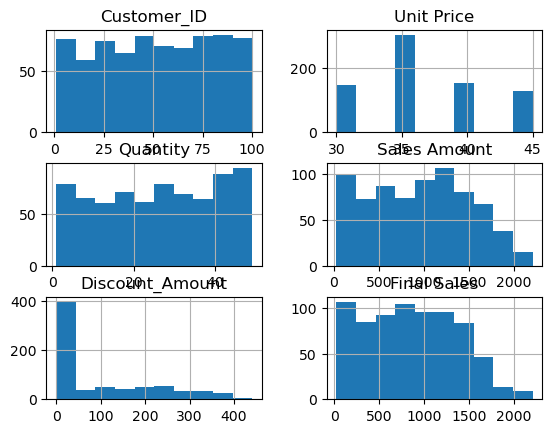

In [4]:
df.hist()
df.info()


In [11]:
summary=df.describe()
duplicate_values=df.duplicated().sum()
print(summary)
print("\nDuplicate Values= ",duplicate_values)

       Customer_ID  Unit Price    Quantity  Sales Amount  Discount_Amount  \
count   730.000000  730.000000  730.000000    730.000000       730.000000   
mean     51.669863   36.794521   26.080822    959.924658        97.393151   
std      29.014339    4.955104   14.480971    551.282730       123.401350   
min       1.000000   30.000000    1.000000     30.000000         0.000000   
25%      27.250000   35.000000   14.000000    495.000000         0.000000   
50%      52.000000   35.000000   27.000000    960.000000        13.000000   
75%      77.000000   40.000000   39.000000   1400.000000       192.000000   
max     100.000000   45.000000   49.000000   2205.000000       441.000000   

       Final Sales  
count   730.000000  
mean    862.531507  
std     509.032315  
min      24.000000  
25%     448.000000  
50%     840.000000  
75%    1260.000000  
max    2205.000000  

Duplicate Values=  0


This process is to analyse the data as it provides the basic statistics of our dataset and also to check if any duplicate values are present.

In [ ]:
df.fillna(df.mean(), inplace=True)


This code is here because if there are any missing values it converts them into the mean values.

In [13]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Weekday"] = df["Date"].dt.day_name()


This is to extract the date values of the sales for our easy analysis further.

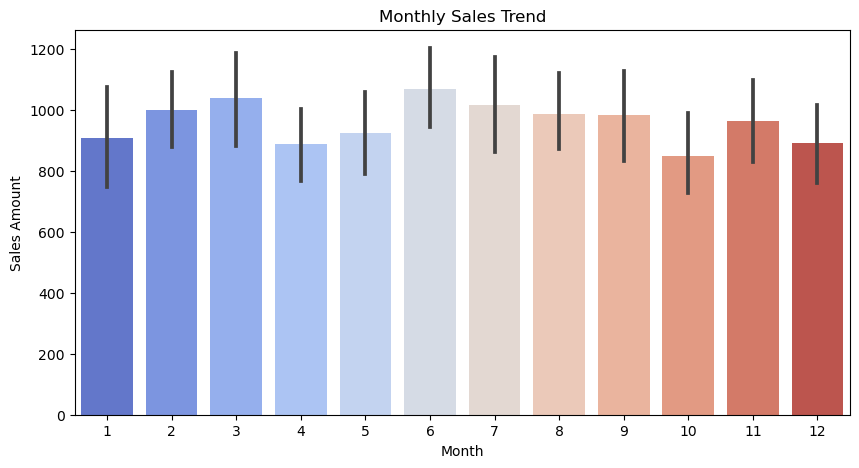

In [15]:
import seaborn as sns  
import matplotlib.pyplot as plt  

plt.figure(figsize=(10,5))  
sns.barplot(x="Month", y="Sales Amount", data=df, palette="coolwarm")  
plt.title("Monthly Sales Trend")  
plt.show()


We can further analyse and make graphs to see the sales amount to see Monthly Sales trend going on so that we can understand the business metrics and can focus to stay in stock for future as it increases the revenue generated.

In [7]:
import matplotlib.pyplot as plt
country_sales=df.groupby("City")["Final Sales"].sum()
print(country_sales)

City
Abha        52831
Buraidah    56875
Dammam      59975
Hail        77257
Jeddah      72048
Khobar      59989
Mecca       66420
Medina      64813
Riyadh      68421
Tabuk       51019
Name: Final Sales, dtype: int64


This code is to see the city wise sales done so that we can analyse which city has better performace and to better focus on that city sales.

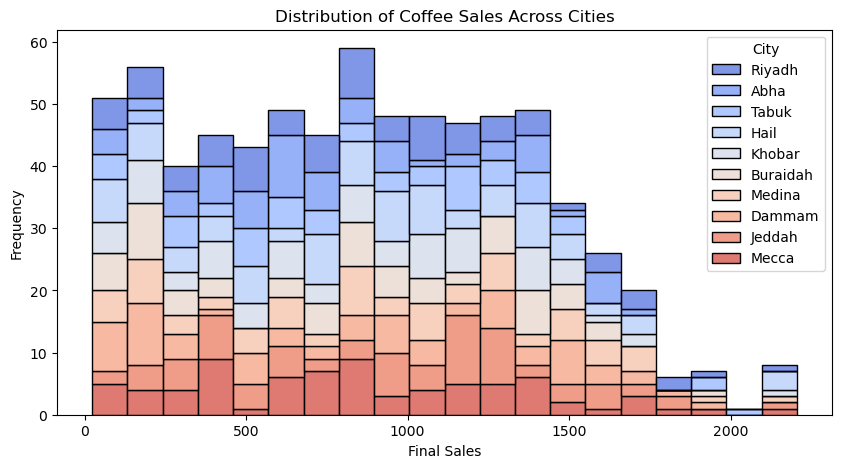

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Final Sales", hue="City", multiple="stack", bins=20, palette="coolwarm")
plt.xlabel("Final Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Coffee Sales Across Cities")
plt.show()

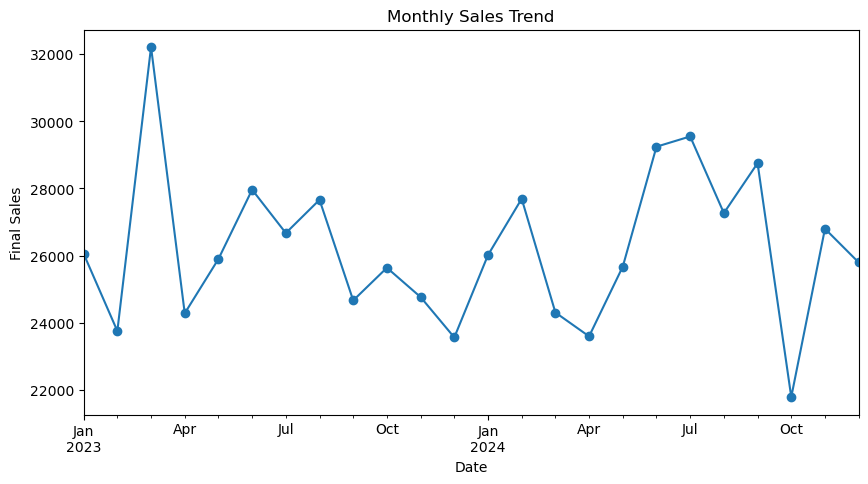

In [9]:
import matplotlib.pyplot as plt
df["Date"] = pd.to_datetime(df["Date"])  
df.set_index("Date")["Final Sales"].resample("M").sum().plot(figsize=(10, 5), marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Final Sales")
plt.show()

We can analyse the frequency by which each city is generating revenue.

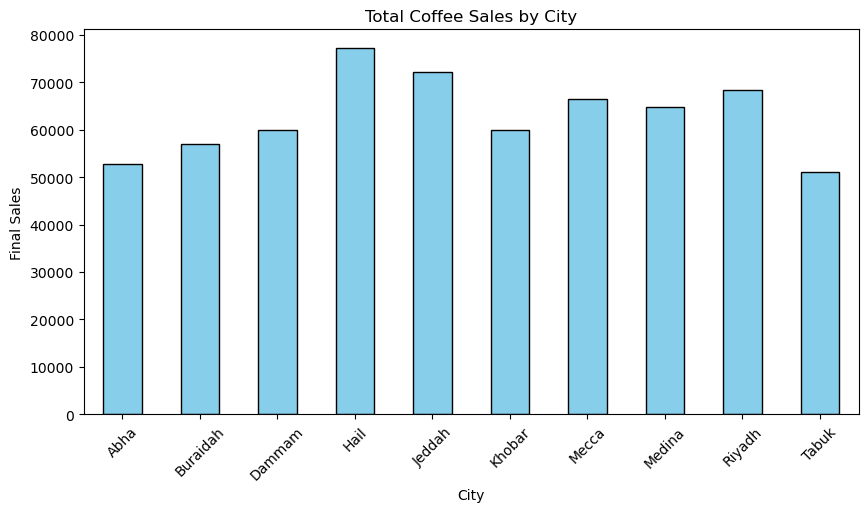

In [12]:
plt.figure(figsize=(10, 5))
country_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("City")
plt.ylabel("Final Sales")
plt.title("Total Coffee Sales by City")
plt.xticks(rotation=45)  
plt.show()

This is other type of graph for better explanation on how each each has demand on the coffee it is easier to understand the metrics by this graph to explain for the client.

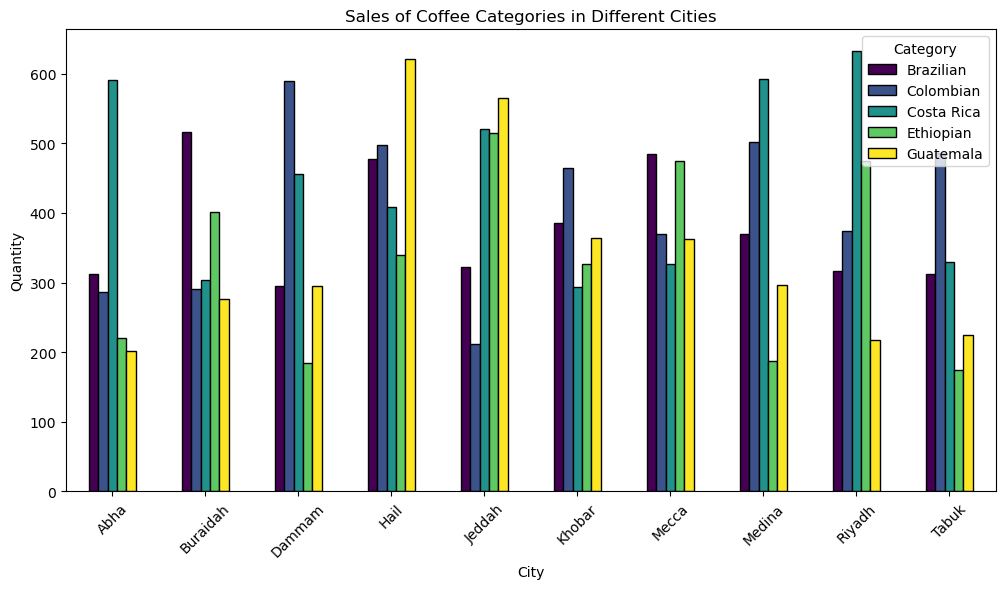

In [16]:
city_category_sales = df.groupby(["City", "Product"])["Quantity"].sum().unstack()


city_category_sales.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

plt.xlabel("City")
plt.ylabel("Quantity")
plt.title("Sales of Coffee Categories in Different Cities")
plt.xticks(rotation=45)  
plt.legend(title="Category")
plt.show()

This graph explains the categories of the coffee beans that are being sold on each city with this graph we can focus on those specific type to generate maximum financial gain.

📈 The month with the highest sales is 6 with total sales of 57208.


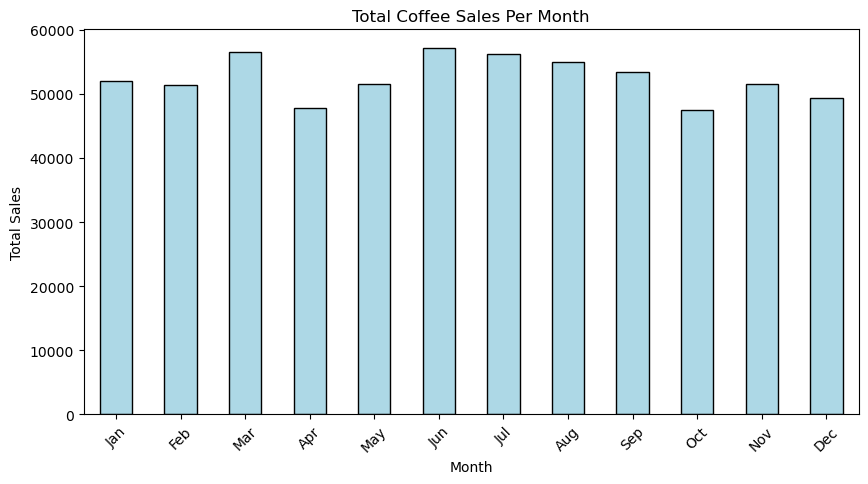

In [19]:

df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month  
monthly_sales = df.groupby("Month")["Final Sales"].sum()
best_month = monthly_sales.idxmax()
best_sales = monthly_sales.max()

print(f"📈 The month with the highest sales is {best_month} with total sales of {best_sales}.")
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind="bar", color="lightblue", edgecolor="black")

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Coffee Sales Per Month")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.show()

Finally we see month wise total sales that are done and by this we can analyse and predict future sales and try to improve the sales with above analysis.

In [23]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  

X = df[["Month"]]  
y = df["Final Sales"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

model = LinearRegression()  
model.fit(X_train, y_train)  
predictions = model.predict(X_test)  
y_pred = model.predict(X_test)
predictions_df = pd.DataFrame({"Actual Sales": y_test.values, "Predicted Sales": y_pred})
print(predictions_df.head(10))  


   Actual Sales  Predicted Sales
0           855       886.131218
1          1008       879.501144
2           455       846.350774
3          1470       833.090627
4           385       879.501144
5           112       852.980848
6          1710       892.761292
7          1316       892.761292
8           588       879.501144
9           528       833.090627


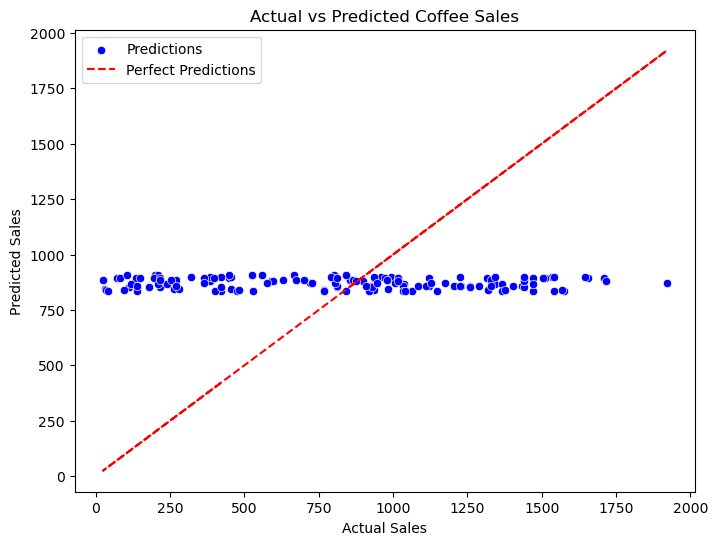

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predictions")
plt.plot(y_test, y_test, color="red", linestyle="dashed", label="Perfect Predictions")

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Coffee Sales")
plt.legend()
plt.show()



Performed simple model to predict the sales using linear regression to just see how the time and month can affect the sales its just a model which does not take any external factorsinto account so we have to be careful when finetuning the model to take every thing into account so that it can predict closer to the actual sales.

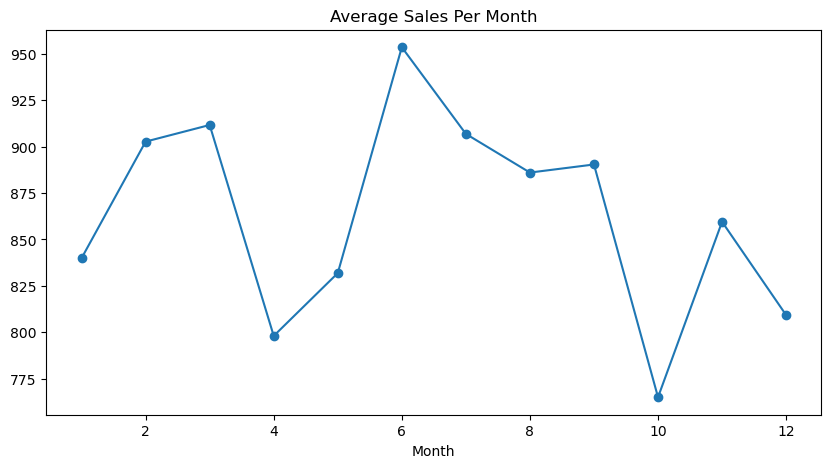

In [27]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Weekday"] = df["Date"].dt.weekday 
df["Day"] = df["Date"].dt.day
df["Is_Weekend"] = df["Weekday"].apply(lambda x: 1 if x >= 5 else 0)  
import matplotlib.pyplot as plt
df.groupby("Month")["Final Sales"].mean().plot(kind="line", marker="o", figsize=(10,5))
plt.title("Average Sales Per Month")
plt.show()


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df[["Month", "Weekday", "Is_Weekend"]]
y = df["Final Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 427.4014289794786


Performed some modelling for the prediction to find the mean absolute error for the developed model we can use different types like ARIMA for near predictions.

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.weekday


X = df[["Month", "Day", "Weekday"]]
y = df["Final Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(predictions_df)



     Actual  Predicted
468     855     835.08
148    1008     952.39
302     455    1105.60
355    1470     627.44
515     385    1215.20
..      ...        ...
404    1440    1229.08
390     448     937.67
218    1330     794.43
135     875     503.77
260     420    1107.59

[146 rows x 2 columns]


Tries with randomforest so the predictions are somewhat closer than linear regression so its important to use proper model for better analysis.

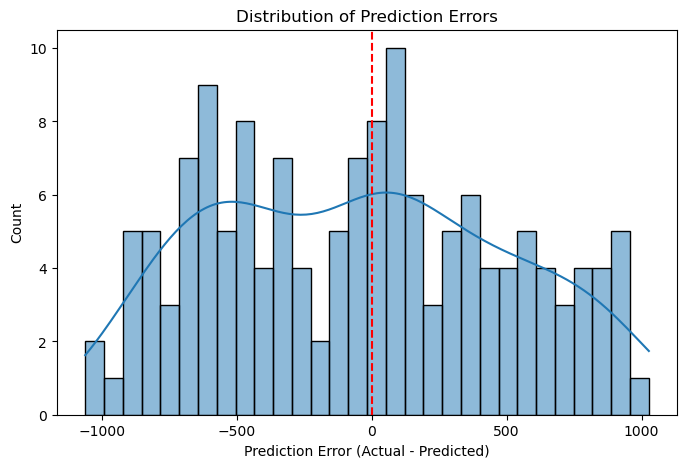

In [22]:
import seaborn as sns

errors = y_test - y_pred  # Calculate prediction errors

plt.figure(figsize=(8, 5))
sns.histplot(errors, bins=30, kde=True)  # Distribution of errors
plt.axvline(x=0, color='r', linestyle="--")
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.show()

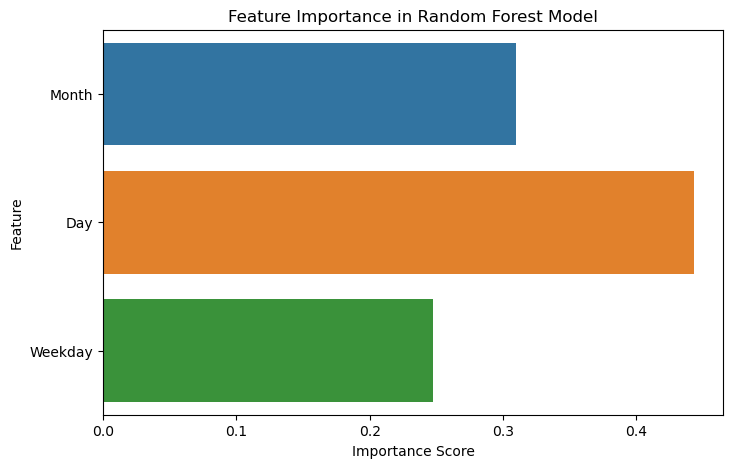

In [23]:
import numpy as np
import seaborn as sns
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


This is a importance score to check the sales on when there are majority of the sales being done so we can focus on them more.